In [ ]:
# ============================
# Step 1: Mount Google Drive
# ============================
from google.colab import drive
drive.mount('/content/drive')

# ============================
# Step 2: Copy zip file to Colab
# ============================
!cp "/content/drive/MyDrive/final_dataset.zip" "/content/final_dataset.zip"

# ============================
# Step 3: Unzip inside Colab (not Drive)
# ============================
!unzip -o /content/final_dataset.zip -d /content/mydata

# ============================
# Step 4: List extracted files
# ============================
!ls /content/mydata

Streaming output truncated to the last 5000 lines.
  inflating: /content/mydata/train/angry/fer_Training_14909933.jpg  
  inflating: /content/mydata/train/angry/fer_Training_9388648.jpg  
  inflating: /content/mydata/train/angry/fer_Training_9430189.jpg  
  inflating: /content/mydata/train/angry/oahega_cropped_emotions.157924~angry.png  
  inflating: /content/mydata/train/angry/fer_Training_64803836.jpg  
  inflating: /content/mydata/train/angry/fer_Training_85423444.jpg  
  inflating: /content/mydata/train/angry/fer_Training_65648141.jpg  
  inflating: /content/mydata/train/angry/fer_Training_63183895.jpg  
  inflating: /content/mydata/train/angry/fer_Training_99489833.jpg  
  inflating: /content/mydata/train/angry/fer_Training_54401970.jpg  
  inflating: /content/mydata/train/angry/fer_Training_98547173.jpg  
  inflating: /content/mydata/train/angry/fer_Training_67625758.jpg  
  inflating: /content/mydata/train/angry/fer_Training_35626629.jpg  
  inflating: /content/mydata/train/angr

# 1. Import Libraries and Set Configurations

In [ ]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from zipfile import ZipFile

print("Import Successfully")

Import Successfully


# 2.Define Training and Validation Directories


In [ ]:
# Directories
train_dir = '/content/mydata/train'
val_dir = '/content/mydata/test'

# 3. Visualize Sample Images from Each Emotion Class

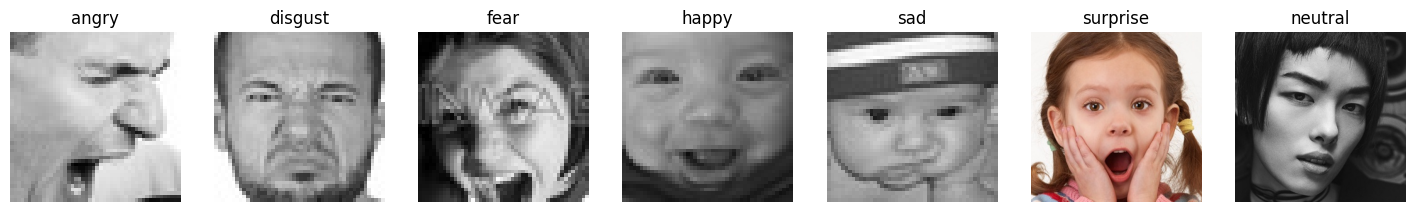

In [ ]:
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
img_size = 48

# Sample images
plt.figure(figsize=(18, 22))
for i, expression in enumerate(emotion_list):
    img_path = os.path.join(train_dir, expression, os.listdir(os.path.join(train_dir, expression))[59])
    img = load_img(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
plt.show()

In [ ]:
# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    shear_range=0.2,         # random shear
    zoom_range=0.2,          # random zoom
    horizontal_flip=True     # random flip
)

test_datagen = ImageDataGenerator(
    rescale=1./255           # only rescale for validation/test
)

# Paths to your dataset folders
train_dir = "/content/mydata/train"
val_dir   = "/content/mydata/test"

# 4. Create Train and Validation Sets

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2   # <-- split 20% for validation
)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

val_set = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)



Found 40409 images belonging to 7 classes.
Found 10106 images belonging to 7 classes.


# 5. CNN Model Architecture and Compilation

In [ ]:
# CNN Model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Classifier
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


# 6.Model Summary

In [ ]:
# Get model summary.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,872,583 (22.40 MB)

 Trainable params: 5,869,767 (22.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

# 7.Callbacks

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=49, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# 8. Train the model

In [ ]:
print("Train classes:", train_set.class_indices)
print("Validation classes:", val_set.class_indices)

Train classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [26]:
# Train
history = model.fit(
    train_set,
    epochs=50,
    validation_data=val_set,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 126s 173ms/step - accuracy: 0.2597 - loss: 2.3569 - val_accuracy: 0.4176 - val_loss: 1.5374 - learning_rate: 5.0000e-04
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 95s 150ms/step - accuracy: 0.4132 - loss: 1.5589 - val_accuracy: 0.5109 - val_loss: 1.2922 - learning_rate: 5.0000e-04
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 94s 149ms/step - accuracy: 0.5009 - loss: 1.3021 - val_accuracy: 0.5511 - val_loss: 1.1793 - learning_rate: 5.0000e-04
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 100s 158ms/step - accuracy: 0.5422 - loss: 1.1987 - val_accuracy: 0.5851 - val_loss: 1.1171 - learning_rate: 5.0000e-04
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 93s 147ms/step - accuracy: 0.5662 - loss: 1.1421 - val_accuracy: 0.5981 - val_loss: 1.0616 - learning_rate: 5.0000e-04
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 94s 148ms/step - accuracy: 0.5722 - loss: 1.1457 - val_accuracy: 0.5984 - val_loss: 1.0706 - learning_rate: 5.0000e-04
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 94s 

# 9.Final Accuracy Evaluation

In [27]:
# Final Accuracy

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train_set, verbose=0)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_set, verbose=0)

# Print results
print(f"Overall Training Accuracy: {train_acc * 100:.2f}%")
print(f"Overall Validation Accuracy: {val_acc * 100:.2f}%")

Overall Training Accuracy: 77.57%
Overall Validation Accuracy: 70.87%


# 10. Plot Accuracy and Loss Curves

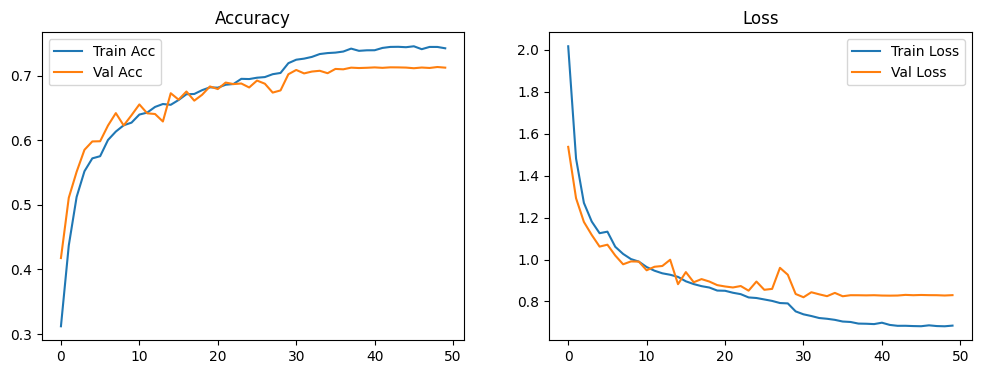

In [28]:
# Plot Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history.history['accuracy'], label='Train Acc')
ax[0].plot(history.history['val_accuracy'], label='Val Acc')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].set_title('Loss')
ax[1].legend()

plt.show()

# 11. Predict on Validation Set

In [29]:
# Predict on validation set
predictions = model.predict(val_set)
y_pred = [np.argmax(p) for p in predictions]
y_test = val_set.classes
class_names = list(val_set.class_indices.keys())

158/158 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step


# 12. Plot Confusion Matrix

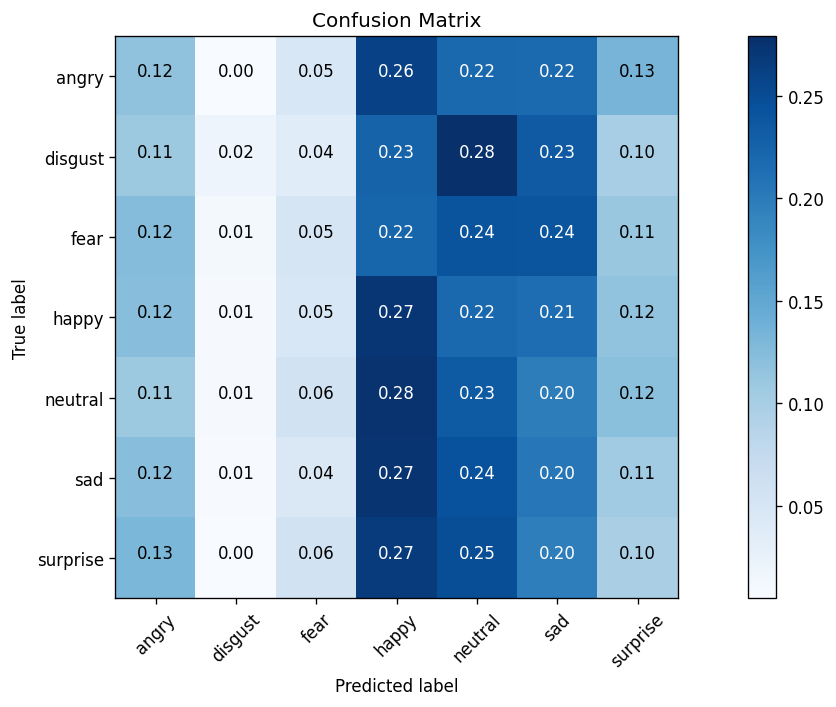

In [30]:


# Confusion matrix plotting function
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
    plt.figure(figsize=(12, 6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)

# 13. Plot Training vs Validation Accuracy and Loss

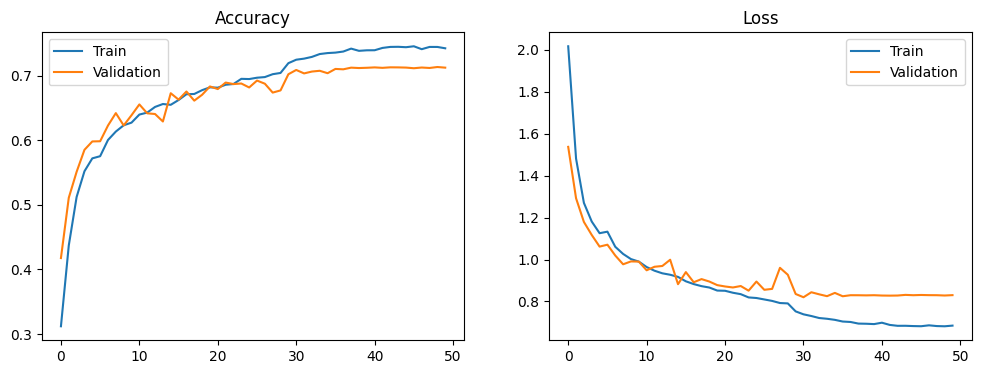

In [31]:
# Accuracy and Loss Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'], label='Train')
ax[0].plot(history.history['val_accuracy'], label='Validation')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train')
ax[1].plot(history.history['val_loss'], label='Validation')
ax[1].set_title('Loss')
ax[1].legend()
plt.show()

# 14. Load and Display a Single Test Image

Image shape: (48, 48)


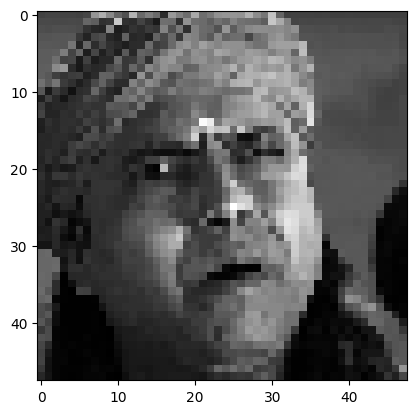

In [35]:
# Predict a single image
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
img_path = "/content/mydata/train/angry/oahega_ed89c3f0ff7e00e0038955b4fd8b0f2e68e1e9f1a25441aa818bdcb3~angry.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")
img_array = np.array(img)
plt.imshow(img_array, cmap='gray')
print("Image shape:", img_array.shape)

# 15. Preprocess and Predict the Emotion of a Single Image

In [36]:
# Preprocess and predict
img_array = img_array.reshape(1, 48, 48, 1)
result = model.predict(img_array)[0]
print("Raw prediction:", result)

predicted_class = np.argmax(result)
print("Predicted label:", label_dict[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw prediction: [1.0000000e+00 0.0000000e+00 1.3146413e-14 0.0000000e+00 1.6764588e-11
 8.0329579e-31 9.4676047e-36]
Predicted label: Angry


# 16. Save Trained Model and Weights

In [42]:
# 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Define paths in your Drive
full_model_path = '/content/drive/MyDrive/Face_Emotion_Recognition.keras'  # full model
weights_path = '/content/drive/MyDrive/Face_Emotion_Recognition_Weights.weights.h5'  # only weights

# 3️⃣ Save full model
model.save(full_model_path)

# 4️⃣ Save only weights
model.save_weights(weights_path)

print(f"Full model saved to: {full_model_path}")
print(f"Weights saved to: {weights_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Full model saved to: /content/drive/MyDrive/Face_Emotion_Recognition.keras
Weights saved to: /content/drive/MyDrive/Face_Emotion_Recognition_Weights.weights.h5
